---
title: "Pandas 10minute"
categories:
- Python
- Assignment
output:
 html_document:
   keep_md: true
date: '2022-06-28'
---

In [ ]:
import numpy as np
import pandas as pd

## 객체 생성
- Series : 기본 정수 인덱스를 생성하도록 값 목록을 전달하여 생성

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- DataFrame : 여러 인덱스와 레이블이 지정된 열이 있는 NumPy 배열을 전달하여 생성

In [ ]:
dates = pd.date_range("20130101", periods = 6)
dates
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD")) #6행 4열
print(df)

                   A         B         C         D
2013-01-01  0.865728  0.292457  1.067028 -0.253106
2013-01-02 -1.909402  1.527000 -0.386110 -0.500735
2013-01-03  0.075965  1.552591  1.350081 -1.812949
2013-01-04 -0.887034 -0.790107 -1.427116  0.506210
2013-01-05 -0.405688  0.656769  2.117183 -0.219086
2013-01-06 -0.425787  1.433215  0.707955 -1.778100


- 시리즈와 같은 구조로 변환할 수 있는 객체 사전을 전달하여 생성

In [ ]:
df2 = pd.DataFrame(
    {
        "A" : 1.0,
        "B" : pd.Timestamp("20130102"),
        "C" : pd.Series(1, index=list(range(4)), dtype='float32'),
        "D" : np.array([3] * 4, dtype='int32'),
        "E" : pd.Categorical(["test","train", "test", "train"]),
        "F" : "foo",   
    }
)
print(df2)
print(df2.dtypes)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo
A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


## 데이터 보기 

### 데이터의 상단 및 하단 행 보기

In [ ]:
print(df.head())

                   A         B         C         D
2013-01-01  0.865728  0.292457  1.067028 -0.253106
2013-01-02 -1.909402  1.527000 -0.386110 -0.500735
2013-01-03  0.075965  1.552591  1.350081 -1.812949
2013-01-04 -0.887034 -0.790107 -1.427116  0.506210
2013-01-05 -0.405688  0.656769  2.117183 -0.219086


In [ ]:
print(df.tail(3))

                   A         B         C         D
2013-01-04 -0.887034 -0.790107 -1.427116  0.506210
2013-01-05 -0.405688  0.656769  2.117183 -0.219086
2013-01-06 -0.425787  1.433215  0.707955 -1.778100


### 인덱스, 열 표시 

- 인덱스 표시

In [ ]:
print(df.index)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


- 열 표시

In [ ]:
print(df.columns)

Index(['A', 'B', 'C', 'D'], dtype='object')


- Numpy를 사용하여 차원형식으로 표현

In [ ]:
print(df.to_numpy())

[[ 0.86572765  0.29245708  1.06702782 -0.25310621]
 [-1.9094016   1.5270004  -0.38610994 -0.5007352 ]
 [ 0.07596547  1.5525908   1.35008097 -1.81294929]
 [-0.88703364 -0.79010667 -1.42711619  0.50621017]
 [-0.40568757  0.65676859  2.11718261 -0.21908563]
 [-0.42578651  1.4332152   0.70795455 -1.77810017]]


- type이 여러가지인경우 상대적으로 비용이 많이든다.

In [ ]:
print(df2.to_numpy())

[[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']]


### 통계요약 

In [ ]:
print(df.describe())

              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean  -0.447703  0.778654  0.571503 -0.676294
std    0.930715  0.927330  1.278356  0.929863
min   -1.909402 -0.790107 -1.427116 -1.812949
25%   -0.771722  0.383535 -0.112594 -1.458759
50%   -0.415737  1.044992  0.887491 -0.376921
75%   -0.044448  1.503554  1.279318 -0.227591
max    0.865728  1.552591  2.117183  0.506210


### 데이터 전치
- 행과 열을 서로 바꿈

In [ ]:
print(df.T)

   2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A    0.865728   -1.909402    0.075965   -0.887034   -0.405688   -0.425787
B    0.292457    1.527000    1.552591   -0.790107    0.656769    1.433215
C    1.067028   -0.386110    1.350081   -1.427116    2.117183    0.707955
D   -0.253106   -0.500735   -1.812949    0.506210   -0.219086   -1.778100


### 행으로 정렬 
- index를 기준으로 정렬
- 기본 방식은 오름차순
  - axis = 1 : 내림차순

In [ ]:
print(df.sort_index(axis=1, ascending=False))

                   D         C         B         A
2013-01-01 -0.253106  1.067028  0.292457  0.865728
2013-01-02 -0.500735 -0.386110  1.527000 -1.909402
2013-01-03 -1.812949  1.350081  1.552591  0.075965
2013-01-04  0.506210 -1.427116 -0.790107 -0.887034
2013-01-05 -0.219086  2.117183  0.656769 -0.405688
2013-01-06 -1.778100  0.707955  1.433215 -0.425787


### 열로 정렬 

In [ ]:
print(df.sort_values(by="B")) # B를 기준으로 오름차순

                   A         B         C         D
2013-01-04 -0.887034 -0.790107 -1.427116  0.506210
2013-01-01  0.865728  0.292457  1.067028 -0.253106
2013-01-05 -0.405688  0.656769  2.117183 -0.219086
2013-01-06 -0.425787  1.433215  0.707955 -1.778100
2013-01-02 -1.909402  1.527000 -0.386110 -0.500735
2013-01-03  0.075965  1.552591  1.350081 -1.812949


## 인덱싱 

### 단일 열 
- 결괏값이 Series로 나온다

In [ ]:
print(df["A"]) 

2013-01-01    0.865728
2013-01-02   -1.909402
2013-01-03    0.075965
2013-01-04   -0.887034
2013-01-05   -0.405688
2013-01-06   -0.425787
Freq: D, Name: A, dtype: float64


- 행을 슬라이스 

In [ ]:
print(df[0:3]) # 1~3행 까지 인덱싱

                   A         B         C         D
2013-01-01  0.865728  0.292457  1.067028 -0.253106
2013-01-02 -1.909402  1.527000 -0.386110 -0.500735
2013-01-03  0.075965  1.552591  1.350081 -1.812949


### 인덱스를 기준으로 해당 인덱스에 포함되는 열값 추출

In [ ]:
print(df.loc[dates[0]]) # 1행의 값을 열별로 구분

A    0.865728
B    0.292457
C    1.067028
D   -0.253106
Name: 2013-01-01 00:00:00, dtype: float64


- 다중 열 추출

In [ ]:
print(df.loc[:, ["A", "B"]]) # A와 B열을 추출

                   A         B
2013-01-01  0.865728  0.292457
2013-01-02 -1.909402  1.527000
2013-01-03  0.075965  1.552591
2013-01-04 -0.887034 -0.790107
2013-01-05 -0.405688  0.656769
2013-01-06 -0.425787  1.433215


- 행의 범위안의 원하는 열 추출

In [ ]:
print(df.loc["20130102":"20130104",["A","B"]]) 
# 행을 슬라이싱하여 해당 행에 포함된 A,B열의 값을 추출

                   A         B
2013-01-02 -1.909402  1.527000
2013-01-03  0.075965  1.552591
2013-01-04 -0.887034 -0.790107


In [ ]:
print(df.loc["20130102",["A","B"]]) 
# 해당되는 행의 크기 축소

A   -1.909402
B    1.527000
Name: 2013-01-02 00:00:00, dtype: float64


- 스칼라값 얻기

In [ ]:
print(df.loc[dates[0],"A"])
# 1행과 A열에 포함되는 값 추출
# = df.at[dates[0],"A"]

0.8657276483198485


### 위치별 추출

In [ ]:
print(df.iloc[3]) # 3번째 index에 해당하는 값 추출

A   -0.887034
B   -0.790107
C   -1.427116
D    0.506210
Name: 2013-01-04 00:00:00, dtype: float64


In [ ]:
print(df.iloc[3:5, 0:2]) # 3~4번째 index에 해당하는 0~1번째 열

                   A         B
2013-01-04 -0.887034 -0.790107
2013-01-05 -0.405688  0.656769


In [ ]:
print(df.iloc[[1,2,4],[0,2]]) # 1,2,4번째 행의 0,2 번째 열 추출

                   A         C
2013-01-02 -1.909402 -0.386110
2013-01-03  0.075965  1.350081
2013-01-05 -0.405688  2.117183


In [ ]:
print(df.iloc[1,1]) # 1행 1열값 추출
# = df.iat[1,1]

1.5270003991486507


### Boolean indexing

In [ ]:
print(df[df["A"] > 0])

                   A         B         C         D
2013-01-01  0.865728  0.292457  1.067028 -0.253106
2013-01-03  0.075965  1.552591  1.350081 -1.812949


- isin()필터링 사용

In [ ]:
df2 = df.copy()
df2["E"]= ["one","one","two","three","four","three"]
print(df2[df2["E"].isin(["two","four"])])  
# E라는 열에 "two"와 "four"가 포함된 행을 추출

                   A         B         C         D     E
2013-01-03  0.075965  1.552591  1.350081 -1.812949   two
2013-01-05 -0.405688  0.656769  2.117183 -0.219086  four


### 설정 

- 새 열을 설정 하면 해당 인덱스별로 데이터가 자동으로 정렬 

In [ ]:
import pandas as pd
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
print(s1)
df["F"]=s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64


- 인덱스 지정 값 설정

In [ ]:
df.at[dates[0],"A"] = 0

- 위치 지정 값 설정 

In [ ]:
df.iat[0,1] = 0

- Numpy 배열로 할당하여 설정 

In [ ]:
df.loc[:,"D"] = np.array([5] * len(df))

In [ ]:
print(df)

                   A         B         C  D    F
2013-01-01  0.000000  0.000000  1.067028  5  NaN
2013-01-02 -1.909402  1.527000 -0.386110  5  1.0
2013-01-03  0.075965  1.552591  1.350081  5  2.0
2013-01-04 -0.887034 -0.790107 -1.427116  5  3.0
2013-01-05 -0.405688  0.656769  2.117183  5  4.0
2013-01-06 -0.425787  1.433215  0.707955  5  5.0


- 설정이 있는 작업 

In [ ]:
df2 = df.copy()
df2[df2 > 0] = -df2
print(df2)

                   A         B         C  D    F
2013-01-01  0.000000  0.000000 -1.067028 -5  NaN
2013-01-02 -1.909402 -1.527000 -0.386110 -5 -1.0
2013-01-03 -0.075965 -1.552591 -1.350081 -5 -2.0
2013-01-04 -0.887034 -0.790107 -1.427116 -5 -3.0
2013-01-05 -0.405688 -0.656769 -2.117183 -5 -4.0
2013-01-06 -0.425787 -1.433215 -0.707955 -5 -5.0


## 누락된 데이터

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+["E"])
df1.loc[dates[0] : dates[1],"E"] = 1
print(df1)

                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000  1.067028  5  NaN  1.0
2013-01-02 -1.909402  1.527000 -0.386110  5  1.0  1.0
2013-01-03  0.075965  1.552591  1.350081  5  2.0  NaN
2013-01-04 -0.887034 -0.790107 -1.427116  5  3.0  NaN


###  누락된 데이터가 있는 행 삭제  
- dropna()
  - default = dropna(axis = 'index', how = 'any')
  - 인덱스 방향으로 훑으면서 nan값이 하나라도 있으면 해당 행 삭제

In [ ]:
print(df1.dropna(how="any"))

                   A      B        C  D    F    E
2013-01-02 -1.909402  1.527 -0.38611  5  1.0  1.0


### 누락된 데이터 채우기
- fillna()

In [ ]:
print(df1.fillna(value=5)) 
# nan값을 value값으로 채운다

                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000  1.067028  5  5.0  1.0
2013-01-02 -1.909402  1.527000 -0.386110  5  1.0  1.0
2013-01-03  0.075965  1.552591  1.350081  5  2.0  5.0
2013-01-04 -0.887034 -0.790107 -1.427116  5  3.0  5.0


### nan값이 존재하는지 확인
- pd.isna() 

In [ ]:
print(pd.isna(df1))

                A      B      C      D      F      E
2013-01-01  False  False  False  False   True  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True


## Operations(작업) 

### 통계
- 일반적으로 누락된 데이터는 제외 

In [ ]:
df.mean()
# 기술통계

A   -0.591991
B    0.729911
C    0.571503
D    5.000000
F    3.000000
dtype: float64

In [ ]:
df.mean(1)

2013-01-01    1.516757
2013-01-02    1.046298
2013-01-03    1.995727
2013-01-04    0.979149
2013-01-05    2.273653
2013-01-06    2.343077
Freq: D, dtype: float64

- 차원이 다르고 정렬이 필요한 개체로 작업 

In [ ]:
s=pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

- 판다스는 지정된 차원을 자동으로 브로드캐스트한다 

In [ ]:
print(df.sub(s,axis="index"))

                   A         B         C    D    F
2013-01-01       NaN       NaN       NaN  NaN  NaN
2013-01-02       NaN       NaN       NaN  NaN  NaN
2013-01-03 -0.924035  0.552591  0.350081  4.0  1.0
2013-01-04 -3.887034 -3.790107 -4.427116  2.0  0.0
2013-01-05 -5.405688 -4.343231 -2.882817  0.0 -1.0
2013-01-06       NaN       NaN       NaN  NaN  NaN


### 데이터에 함수 입력 

In [ ]:
print(df.apply(np.cumsum))

                   A         B         C   D     F
2013-01-01  0.000000  0.000000  1.067028   5   NaN
2013-01-02 -1.909402  1.527000  0.680918  10   1.0
2013-01-03 -1.833436  3.079591  2.030999  15   3.0
2013-01-04 -2.720470  2.289485  0.603883  20   6.0
2013-01-05 -3.126157  2.946253  2.721065  25  10.0
2013-01-06 -3.551944  4.379468  3.429020  30  15.0


In [ ]:
df.apply(lambda x :x.max()-x.min())

A    1.985367
B    2.342697
C    3.544299
D    0.000000
F    4.000000
dtype: float64

### 히스토그램
- 분포정도

In [ ]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    4
1    0
2    2
3    2
4    2
5    5
6    6
7    3
8    6
9    0
dtype: int64

In [ ]:
s.value_counts()

2    3
0    2
6    2
4    1
5    1
3    1
dtype: int64

### 문자열 

In [ ]:
s = pd.Series(["A",'B','C','Aaba', 'Baca', np.nan, "CABA", "dog","cat"])
print(s.str.lower())
print("-----upper-----")
print(s.str.upper())

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object
-----upper-----
0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object


## 병합 
- Series 및 DataFrame을 쉽게 결합
- concat

In [ ]:
df = pd.DataFrame(np.random.randn(10,4))
print(df)

          0         1         2         3
0  0.449724  0.286135  0.502216  0.573424
1  0.777551 -0.485242  1.342152 -0.293918
2 -1.760999  1.052294  0.699095  1.558663
3  1.535162  1.099069  0.609733 -0.577464
4  0.987425  0.175097 -0.239427  0.011823
5 -0.804263  0.216801  0.135882 -0.252641
6 -0.953844  0.527005 -0.209263 -1.696837
7 -0.726548  0.974055 -0.660680 -0.950009
8 -0.889739 -0.793810  0.403333 -0.295826
9  0.001348 -2.033730 -0.657308 -0.347856


In [ ]:
pieces = [df[:3], df[3:7],df[7:]] # 리스트형식
pieces

[          0         1         2         3
 0  0.449724  0.286135  0.502216  0.573424
 1  0.777551 -0.485242  1.342152 -0.293918
 2 -1.760999  1.052294  0.699095  1.558663,
           0         1         2         3
 3  1.535162  1.099069  0.609733 -0.577464
 4  0.987425  0.175097 -0.239427  0.011823
 5 -0.804263  0.216801  0.135882 -0.252641
 6 -0.953844  0.527005 -0.209263 -1.696837,
           0         1         2         3
 7 -0.726548  0.974055 -0.660680 -0.950009
 8 -0.889739 -0.793810  0.403333 -0.295826
 9  0.001348 -2.033730 -0.657308 -0.347856]

In [ ]:
print(pd.concat(pieces))

          0         1         2         3
0  0.449724  0.286135  0.502216  0.573424
1  0.777551 -0.485242  1.342152 -0.293918
2 -1.760999  1.052294  0.699095  1.558663
3  1.535162  1.099069  0.609733 -0.577464
4  0.987425  0.175097 -0.239427  0.011823
5 -0.804263  0.216801  0.135882 -0.252641
6 -0.953844  0.527005 -0.209263 -1.696837
7 -0.726548  0.974055 -0.660680 -0.950009
8 -0.889739 -0.793810  0.403333 -0.295826
9  0.001348 -2.033730 -0.657308 -0.347856


## Join
- db스타일이 병합
- merge

In [ ]:
left = pd.DataFrame({"Key":["foo","foo"], "lval":[1,2]})
right = pd.DataFrame({"Key":["foo","foo"], "rval":[4,5]})
print(left)
print('----right----')
print(right)

   Key  lval
0  foo     1
1  foo     2
----right----
   Key  rval
0  foo     4
1  foo     5


In [ ]:
print(pd.merge(left,right,on="Key"))

   Key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5


In [ ]:
left = pd.DataFrame({"Key":["foo","bar"], "lval":[1,2]})
right = pd.DataFrame({"Key":["foo","bar"], "rval":[4,5]})
print(left)
print('----right----')
print(right)

   Key  lval
0  foo     1
1  bar     2
----right----
   Key  rval
0  foo     4
1  bar     5


In [ ]:
print(pd.merge(left,right,on="Key"))

   Key  lval  rval
0  foo     1     4
1  bar     2     5


## Grouping
- 하나 이상을 포함하는 프로세스를 의미
  - 기준에 따라 데이터를 구룹으로 분할
  - 각 그룹에 독립적으로 기능 적용
  - 결과를 데이터 구조로 결합 

In [ ]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
print(df)

     A      B         C         D
0  foo    one  0.844088 -0.974067
1  bar    one -2.392914  0.557553
2  foo    two  0.667617  0.410376
3  bar  three  0.271053  1.160380
4  foo    two  0.844380 -0.665977
5  bar    two  0.366607  1.947910
6  foo    one -0.480591  0.607410
7  foo  three -1.137906 -0.628921


### A를 기준으로 그룹화 후 더하기 

In [ ]:
print(df.groupby("A").sum())

            C         D
A                      
bar -1.755254  3.665843
foo  0.737587 -1.251179


### A와 B를 그룹화 후 더하기 

In [ ]:
print(df.groupby(["A","B"]).sum())

                  C         D
A   B                        
bar one   -2.392914  0.557553
    three  0.271053  1.160380
    two    0.366607  1.947910
foo one    0.363496 -0.366657
    three -1.137906 -0.628921
    two    1.511997 -0.255601


## Reshaping 

In [ ]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=["first","second"])
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=["A","B"])
df2 = df[:4]
print(df2)

                     A         B
first second                    
bar   one     2.536753 -0.409669
      two     0.248299  0.410299
baz   one    -0.791332 -1.745028
      two    -1.678724 -0.540814


### 압축
- stacked()

In [ ]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    2.536753
               B   -0.409669
       two     A    0.248299
               B    0.410299
baz    one     A   -0.791332
               B   -1.745028
       two     A   -1.678724
               B   -0.540814
dtype: float64

#### 역연산
- 기본적으로 마지막 레벨의 스택을 해제한다. 

In [ ]:
stacked.unstack()

A         B
first second                    
bar   one     2.536753 -0.409669
      two     0.248299  0.410299
baz   one    -0.791332 -1.745028
      two    -1.678724 -0.540814

In [ ]:
stacked.unstack(1)

second        one       two
first                      
bar   A  2.536753  0.248299
      B -0.409669  0.410299
baz   A -0.791332 -1.678724
      B -1.745028 -0.540814

In [ ]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  2.536753 -0.791332
       B -0.409669 -1.745028
two    A  0.248299 -1.678724
       B  0.410299 -0.540814

### Pivot table
- 데이터프레임의 액셀화 

- 데이터 불러오기

In [ ]:
df = pd.DataFrame(
    {
        "A":["one", "one", "two", "three"] * 3,
        "B":["A","B","C"] * 4,
        "C":["foo", "foo", "foo", "bar", "bar", "bar"]*2,
        "D":np.random.randn(12),
        "E":np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.472353,1.319584
1,one,B,foo,0.814895,0.186319
2,two,C,foo,-1.231097,0.146430
3,three,A,bar,-0.048371,0.301440
4,one,B,bar,0.118259,-0.269829
5,one,C,bar,1.188139,-1.339077
6,two,A,foo,1.183869,-0.878976
7,three,B,foo,-0.419601,0.990978
8,one,C,foo,-0.613792,-1.098215
9,one,A,bar,-0.002902,-0.330832


- 피벗테이블 만들기 

In [ ]:
# A와 B의 컬럼으로 그룹바이를 하는데 컬럼명은 C, values값은 D로한다.
pd.pivot_table(df, values="D", index=["A","B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.002902  0.472353
      B  0.118259  0.814895
      C  1.188139 -0.613792
three A -0.048371       NaN
      B       NaN -0.419601
      C -0.666981       NaN
two   A       NaN  1.183869
      B -0.253640       NaN
      C       NaN -1.231097

## Time series
- pandas는 시간변환에 엄청 강하고 효율적이다 

In [ ]:
rng = pd.date_range("1/1/2012", periods=100, freq="S") # Second단위
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    25887
Freq: 5T, dtype: int64

### 시간 표현 

In [ ]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D") # Day단위
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.056279
2012-03-07    1.689753
2012-03-08    0.581104
2012-03-09    0.274412
2012-03-10   -0.611934
Freq: D, dtype: float64

In [ ]:
# 협정시계시
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -1.056279
2012-03-07 00:00:00+00:00    1.689753
2012-03-08 00:00:00+00:00    0.581104
2012-03-09 00:00:00+00:00    0.274412
2012-03-10 00:00:00+00:00   -0.611934
Freq: D, dtype: float64

### 다른 시간대로 변환 

In [ ]:
# 미국 동부로 시간변환
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -1.056279
2012-03-06 19:00:00-05:00    1.689753
2012-03-07 19:00:00-05:00    0.581104
2012-03-08 19:00:00-05:00    0.274412
2012-03-09 19:00:00-05:00   -0.611934
Freq: D, dtype: float64

### 시간범위 표현 간 변환

In [ ]:
rng = pd.date_range("1/1/2012", periods=5,freq="M") # Month 단위
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-01-31    1.219098
2012-02-29   -0.532026
2012-03-31    0.642991
2012-04-30    0.993084
2012-05-31   -0.744262
Freq: M, dtype: float64

In [ ]:
ps = ts.to_period() # 달까지 표시하겠다
ps

2012-01    1.219098
2012-02   -0.532026
2012-03    0.642991
2012-04    0.993084
2012-05   -0.744262
Freq: M, dtype: float64

In [ ]:
ps.to_timestamp()

2012-01-01    1.219098
2012-02-01   -0.532026
2012-03-01    0.642991
2012-04-01    0.993084
2012-05-01   -0.744262
Freq: MS, dtype: float64

### 마침표와 타임스탬프 사이 변환 

In [ ]:
prng = pd.period_range("1990Q1","2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)),prng)
ts.index = (prng.asfreq("M","e")+1).asfreq("H","s")+9
ts.head()

1990-03-01 09:00    1.084262
1990-06-01 09:00   -0.958435
1990-09-01 09:00    1.222262
1990-12-01 09:00   -0.644455
1991-03-01 09:00   -0.278623
Freq: H, dtype: float64

## 범주(Categoricals)
- 범주형 데이터를 DataFrame으로 부른다 

In [ ]:
df = pd.DataFrame(
     {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)


In [ ]:
df["grade"]=df["raw_grade"].astype("category") # grade라는 Series에 카테고리 생성해주기
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [ ]:
df["grade"].cat.categories=["very good", "good", "very bad"]

- 범주를 재정렬 후 누락된 범주 추가

In [ ]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

- 정렬은 범주의 순서에 따라 이루어진다 

In [ ]:
df.sort_values(by="grade") # grade 범주 순으로 정렬

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


- 범주형 열을 기준으로 그룹화하면 빈 범주도 표시 

In [ ]:
df.groupby("grade").size() # bad, medium도 표시된다

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 시각화 

In [ ]:
import matplotlib.pyplot as plt
plt.close("all")

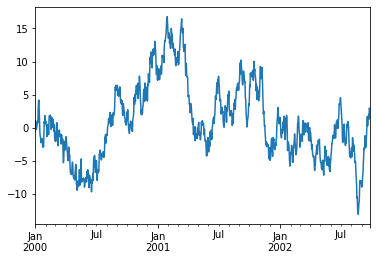

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000",periods=1000))
ts = ts.cumsum() # 누적합 구하기
ts.plot()

- plot()메서드는 레이블이 있는 모든열을 그리는데 편리 

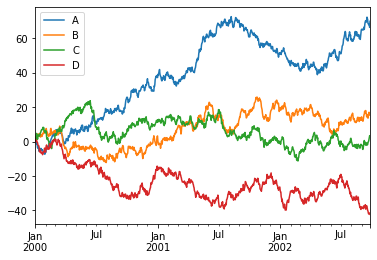

In [ ]:
df = pd.DataFrame(
    np.random.randn(1000,4), index=ts.index, columns=["A","B","C","D"]
)
df = df.cumsum()
df.plot()
plt.legend(loc='best'); # 범례 추가

## 데이터 입출력
  

### csv 파일 쓰기


In [ ]:
df.to_csv("foo.csv")

### csv 파일에서 읽기 

In [ ]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.060692,0.105831,1.634998,0.772662
1,2000-01-02,0.504047,0.861909,0.919295,1.285729
2,2000-01-03,0.147256,2.801748,1.466028,0.051882
3,2000-01-04,-0.188261,1.605617,3.807387,0.548725
4,2000-01-05,-1.284756,1.304981,4.781101,0.764170
...,...,...,...,...,...
995,2002-09-22,67.967114,16.397385,0.346370,-42.046715
996,2002-09-23,68.446463,17.084053,1.419101,-41.482823
997,2002-09-24,67.728754,16.569164,2.337529,-41.447092
998,2002-09-25,66.412904,16.833811,3.513496,-41.535883


### HDF5 파일 쓰기 

In [ ]:
df.to_hdf("foo.h5","df")

### HDF5 파일 읽기 

In [ ]:
pd.read_hdf("foo.h5","df")

,A,B,C,D
2000-01-01,0.060692,0.105831,1.634998,0.772662
2000-01-02,0.504047,0.861909,0.919295,1.285729
2000-01-03,0.147256,2.801748,1.466028,0.051882
2000-01-04,-0.188261,1.605617,3.807387,0.548725
2000-01-05,-1.284756,1.304981,4.781101,0.764170
...,...,...,...,...
2002-09-22,67.967114,16.397385,0.346370,-42.046715
2002-09-23,68.446463,17.084053,1.419101,-41.482823
2002-09-24,67.728754,16.569164,2.337529,-41.447092
2002-09-25,66.412904,16.833811,3.513496,-41.535883


###  엑셀 파일 쓰기 

In [ ]:
df.to_excel("foo.xlsx",sheet_name="sheet1")

### 엑셀 파일 읽기 

In [ ]:
pd.read_excel("foo.xlsx", "sheet1", index_col=None, na_values=["NA"]) # 결측치를 NA로 표시

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.060692,0.105831,1.634998,0.772662
1,2000-01-02,0.504047,0.861909,0.919295,1.285729
2,2000-01-03,0.147256,2.801748,1.466028,0.051882
3,2000-01-04,-0.188261,1.605617,3.807387,0.548725
4,2000-01-05,-1.284756,1.304981,4.781101,0.764170
...,...,...,...,...,...
995,2002-09-22,67.967114,16.397385,0.346370,-42.046715
996,2002-09-23,68.446463,17.084053,1.419101,-41.482823
997,2002-09-24,67.728754,16.569164,2.337529,-41.447092
998,2002-09-25,66.412904,16.833811,3.513496,-41.535883
